In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
#import the preprocess library of image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
#rescale =  pixel value rescaling to 0 to 1 from 0 to 255
#shear_range => counter clock wise rotation(anti clock)

In [ ]:
test_datagen  = ImageDataGenerator(rescale=1./255)

In [ ]:
#load your images data

In [ ]:
#load your images data

In [30]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Flowers',target_size=(128,128),batch_size=100,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [31]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Flowers",target_size=(128,128),batch_size=100,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [32]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Create Model

In [33]:
#initialize the model
model = Sequential()

# Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)


In [34]:
#add convlution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
# 32 => no of feature detectors
#(3,3)=> kernel size(feature detector size => 3*3 matrix)

In [35]:
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [36]:
# you can add more convolutiona and pooling layers
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
#flatten layer => input layer to your ANN
model.add(Flatten())

In [46]:
#hidden layers
model.add(Dense(units=500,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=400,kernel_initializer="random_uniform",activation="relu"))

In [47]:
#output layer
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

# Compile The Model

In [48]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Fit The Model

In [52]:
#train the model
model.fit(x_train,steps_per_epoch=len(x_train),epochs=1,validation_data=x_test,validation_steps=len(x_test))
#steps_per_epoch = no of train images/batch size
#validation_steps = no of test images/batch size

44/44 [==============================] - 147s 3s/step - loss: 1.5993 - accuracy: 0.2437 - val_loss: 1.5986 - val_accuracy: 0.2437


# Save The Model

In [53]:
model.save("/flowers.h5")

# Test The Model

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [55]:
model = load_model("/flowers.h5")

In [57]:
img = image.load_img("/content/drive/MyDrive/IBM/sunflower.jpg",target_size=(128,128))

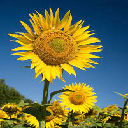

In [ ]:
img

In [58]:
x = image.img_to_array(img)

In [59]:
x

array([[[ 94., 127.,  56.],
        [ 92., 125.,  54.],
        [ 90., 123.,  52.],
        ...,
        [ 96., 128.,  52.],
        [104., 135.,  59.],
        [112., 140.,  65.]],

       [[106., 133.,  64.],
        [109., 136.,  67.],
        [109., 136.,  67.],
        ...,
        [101., 132.,  54.],
        [111., 139.,  62.],
        [115., 142.,  65.]],

       [[129., 150.,  85.],
        [130., 151.,  86.],
        [132., 153.,  88.],
        ...,
        [108., 137.,  53.],
        [112., 141.,  59.],
        [120., 144.,  66.]],

       ...,

       [[141., 159., 111.],
        [134., 153.,  98.],
        [125., 145.,  86.],
        ...,
        [ 62.,  96.,   2.],
        [ 55.,  88.,   7.],
        [ 48.,  82.,   8.]],

       [[141., 158., 113.],
        [138., 155., 110.],
        [132., 150., 102.],
        ...,
        [ 62.,  96.,   2.],
        [ 55.,  88.,   7.],
        [ 47.,  81.,   7.]],

       [[133., 152., 106.],
        [128., 150., 101.],
        [116., 1

In [60]:
x.shape

(128, 128, 3)

In [61]:
#(1,64,64,3) to expand the dims

In [62]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [63]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 242ms/step


In [64]:
pred_prob

array([[0.17730328, 0.23598376, 0.18361217, 0.17295957, 0.23014121]],
      dtype=float32)

In [69]:
class_name=['tulip','sunflower','rose','dandelion','daisy',]
pred_id = pred_prob.argmax(axis=1)[0]

In [70]:
pred_id

1

In [71]:
print("predicted Flower is ",str(class_name[pred_id]))

predicted Flower is  sunflower
